# Name: Muhammad Fawad
# Task : Sales Prediction Using Python

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Exploratory Data Analysis (EDA)

### Importing Dataset

In [2]:
sales_dataset = pd.read_csv('D:\Datasets\Sales Prediction Using Python.zip')
sales_dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
sales_dataset.shape

(200, 5)

In [4]:
sales_dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
sales_dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### The dataset contains three advertising platform: TV, Radio, Newspaper and corresponding Sales.

### Visualizing each platform

In [6]:
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Using describe function to better visualize the statistical performance of the dataset

In [7]:
sales_dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### we can observed that:
* Average expense is highest on Tv
* Average expense is lowest on Radio
* Maximum sales is 27 and Minimum sales is 1.6

#### Finding Null values

In [8]:
sales_dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Creating pairplot to visualize the data

D:\Anaconda\Installed_Software\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


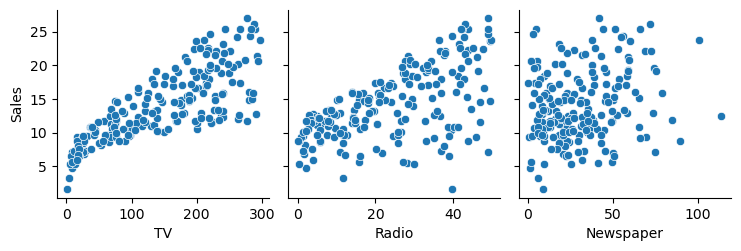

In [9]:
sns.pairplot(sales_dataset, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales', kind = 'scatter')
plt.show()

#### The pair plot reveals a direct correlation between TV ad spending and sales, with an evident increase in tandem. Radio ads display a scattered relationship, while newspaper advertising shows unpredictability in influencing sales.


#### Visualizing the data with the help of Histogram

<Axes: xlabel='TV', ylabel='Count'>

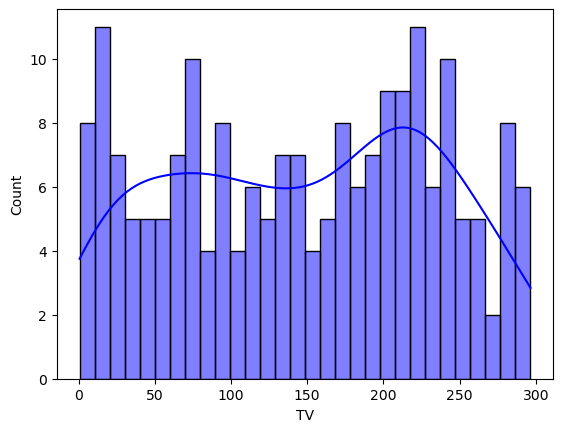

In [10]:
sns.histplot(sales_dataset['TV'],bins=30, color = 'blue', kde=True)

<Axes: xlabel='Radio', ylabel='Count'>

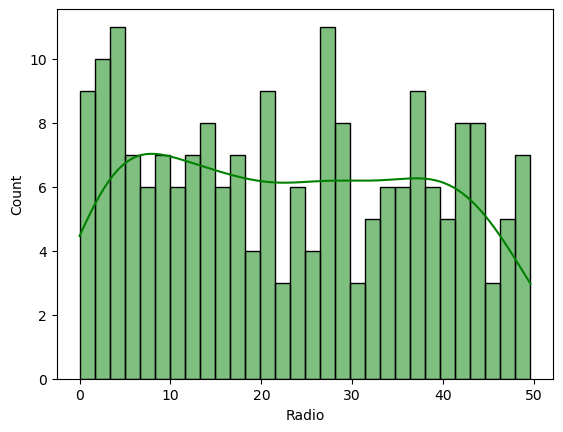

In [11]:
sns.histplot(sales_dataset['Radio'],bins=30, color = 'green', kde=True)

<Axes: xlabel='Newspaper', ylabel='Count'>

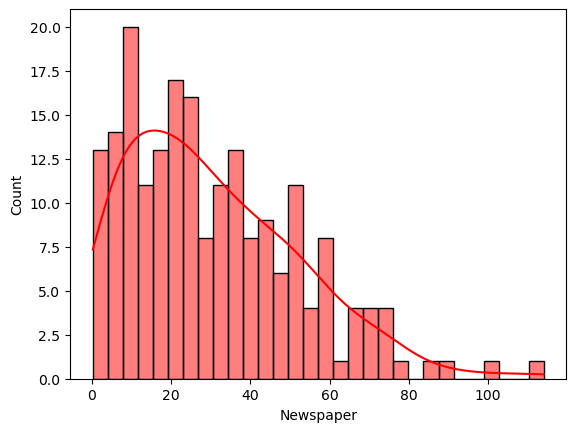

In [12]:
sns.histplot(sales_dataset['Newspaper'],bins=30, color = 'red', kde=True)

#### we can observe that:
* The majority sales is the result of low advertising in Newspaper

### Finding the correlation

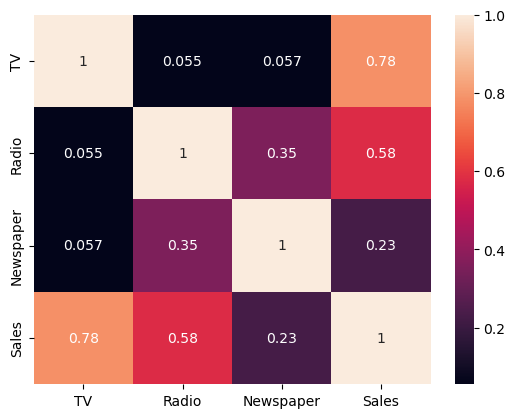

In [13]:
sns.heatmap(sales_dataset.corr(), annot=True)
plt.show()

#### We can clearly observe that Sales is highly correlated with TV ads

## Training a Model

#### We concluded from visualization step that Sales is highly correlated with TV ads, We will use regression model as we have only one variable: TV.

#### Splitting the data into test and train data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(sales_dataset[['TV']], sales_dataset[['Sales']], test_size = 0.3, random_state =0)

In [15]:
print(x_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [16]:
print(y_train)

     Sales
131   12.7
96    11.7
181   12.2
19    14.6
153   19.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [17]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [18]:
print(y_test)

     Sales
18    11.3
170    8.4
107    8.7
98    25.4
177   11.7
182    8.7
5      7.2
146   13.2
12     9.2
152   16.6
61    24.2
125   10.6
180   10.5
154   15.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    14.9
159   12.9
60     8.1
123   15.2
179   12.6
185   22.6
122   11.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     12.9
83    13.6
106    7.2
134   10.8
66     9.5
26    15.0
113   15.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    15.5
149   10.1
24     9.7
30    21.4
160   14.4
40    16.6
56     5.5


In [19]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
result = model.predict(x_test)
print(result)

[[10.48116264]
 [ 9.60152727]
 [11.4524267 ]
 [20.58322509]
 [15.1084112 ]
 [ 9.8855762 ]
 [ 7.70939494]
 [18.31083372]
 [ 8.40119151]
 [16.36372418]
 [19.28209777]
 [11.3058208 ]
 [14.48533615]
 [15.91474363]
 [10.81102591]
 [12.81769409]
 [19.47909945]
 [ 7.3428802 ]
 [10.73314153]
 [17.08759078]
 [20.48701497]
 [13.73856237]
 [15.33290148]
 [13.34455903]
 [ 9.76187747]
 [12.95055569]
 [14.89766523]
 [16.70275031]
 [17.57322281]
 [ 8.46075015]
 [10.41702256]
 [16.42328282]
 [20.17089601]
 [18.38413667]
 [ 7.91555948]
 [ 8.16753836]
 [10.04134496]
 [15.59404323]
 [10.44451117]
 [ 8.45616872]
 [ 9.00135939]
 [ 8.75396194]
 [13.85767966]
 [16.91349628]
 [17.17921947]
 [12.01594311]
 [ 7.70481351]
 [ 8.08507255]
 [13.06967298]
 [12.10299036]
 [12.34122494]
 [17.82520169]
 [18.93849021]
 [15.78188203]
 [ 9.35871126]
 [10.16504368]
 [20.72983099]
 [15.21378419]
 [16.58821446]
 [ 7.64525486]]


#### We have successfully predicted the Sales using advertising platform dataset